# TAREA 2 IA II JOSÉ MIGUEL GONZÁLEZ ZARAGOZA 631145 IRSI 7MO SEMESTRE

In [1]:
"""
AUTHOR:         José Miguel González Zaragoza
                631145-IRSI-7MO_SEMESTRE
INSTITUTION:    UNIVERSIDAD DE MONTERREY
DATE:           08/23/2024
INSTRUCTOR:     Dr Andrés Hernández Gutiérrez
COURSE:         ARTIFICIAL INTELLIGENCE II


Assignment 02 (Programming activity): Using the previous Python code for
simple linear regression using tensorflow, create a Jupyter Notebook and carry
out the following:
• add a markdown cell to explain what each code cell does
• create a remote repository in GitHub. Name it as
simple-linear-regression-using-tensorflow and push your Jupyter
Notebook up to GitHub
• when finished, also upload your Jupyter Notebook to Blackboard
• include the link to your GitHub repository in a txt file and upload this file
to Blackboard
"""

'\nAssignment 02 (Programming activity): Using the previous Python code for\nsimple linear regression using tensorflow, create a Jupyter Notebook and carry\nout the following:\n• add a markdown cell to explain what each code cell does\n• create a remote repository in GitHub. Name it as\nsimple-linear-regression-using-tensorflow and push your Jupyter\nNotebook up to GitHub\n• when finished, also upload your Jupyter Notebook to Blackboard\n• include the link to your GitHub repository in a txt file and upload this file\nto Blackboard\n'

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
"""
Importación de librerías básicas y populares para el análisis de datos, el aprendizaje automático (machine learning) y la visualización de estos datos:
Numpy: Dirigida a trabajar con arreglos y matrices para operaciones aritméticas complejas o repetitivas, teniendo como alias 'np'.
Pandas: Aunque no se ha importado explícitamente en el código proporcionado, se usa para manipulación y análisis de datos, especialmente para tablas... 
de datos, y se importa con el alias 'pd'.
TensorFlow: Esta librería, de código abierto y desarrollada por Google, se utiliza para construir y entrenar modelos de aprendizaje automático y... 
redes neuronales, con el alias 'tf'.
Matplotlib.pyplot: Es nuestra herramienta principal para la visualización de datos. Similar a MATLAB, se importa el submódulo pyplot para generar gráficos.
Scikit-learn: Aunque no se importa explícitamente en el código proporcionado, es una biblioteca de Python dedicada al aprendizaje automático. Utiliza la... 
función train_test_split para dividir un conjunto de datos en dos subconjuntos: entrenamiento y prueba (train y test), lo que permite evaluar el... 
rendimiento de un modelo.
"""

In [3]:
def generate_data(true_coeffs=np.array([10,1]), noise_std=2, num_samples=100):
    
    #Seed for reproducibility
    np.random.seed(4500)

    #Generate synthteic data
    x=np.arange(0.,100, 1)
    y=true_coeffs[0] + true_coeffs[1]*x + np.random.normal(loc=0.0, scale=noise_std, size=num_samples)

    #Return features and response
    return (x,y)

In [ ]:
"""
La función se dedica a generar datos sintéticos y tiene parámetros para hacerlo de manera constante usando fórmulas matemáticas.
'true_coeffs': Son los coeficientes para el modelo, generados a partir de un arreglo de np. En este caso, el 10 representa el...
intercepto y el 1 la pendiente, dándonos la función 'y = 10 + 1 * x'.
'noise_std': Es la desviación estándar del ruido gaussiano que se añade a los datos, con un valor de 2.
'num_samples': Es el número de muestras a generar, por defecto es 100, pero puede modificarse.
'np.random.seed(4500)': Es una semilla generadora de números aleatorios de Numpy. Esto asegura que los resultados sean reproducibles, de...
 modo que cada vez que se ejecute la función se obtendrán los mismos datos sintéticos.
'x = np.arange(0., 100, 1)' y 'y = true_coeffs[0] + true_coeffs[1] * x + np.random.normal(loc=0.0, scale=noise_std, size=num_samples)': Estas... 
son las fórmulas utilizadas para generar los datos. La primera crea un arreglo que va de 0 a 99 en saltos de 1. La segunda fórmula utiliza... 
los coeficientes y los aplica a la función 'y = 10 + 1 * x', añadiendo el valor de ruido gaussiano generado por np.random.normal con media 0.0 y... 
desviación estándar noise_std (2) para simular mediciones ruidosas.
Finalmente, la función retorna una tupla con los valores '(x, y)'.
"""

In [4]:
#Generate a synthetic dataset for simple linear regression
true_coeffs = np.array([10, 1])
noise_std=5
x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)

In [ ]:
"""
En esta sección, definimos los coeficientes y el ruido para la función que declaramos anteriormente. En este caso, generamos... 
la misma función, pero con un ruido gaussiano de 5. Los valores de los coeficientes y el ruido se pasan a la función... 
anterior, y obtenemos la tupla '(x, y)'.
"""

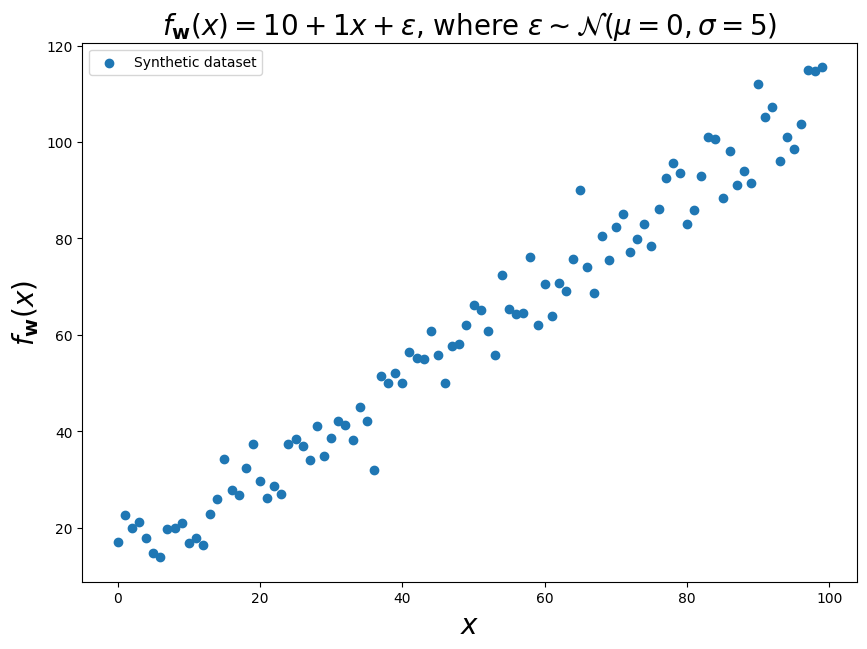

In [5]:
plt.figure(figsize=(10,7))
plt.scatter(x,y,label='Synthetic dataset')
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x +\epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$",
          fontsize=20)
plt.legend()
plt.show()

In [ ]:
"""
En esta sección, creamos una figura tipo gráfico de dispersión con las etiquetas para los ejes 'x' y 'f_w(x)', que... 
representan la salida de 'y' de la tupla. Sobre el gráfico de dispersión, se puede apreciar la función que... 
utilizamos para generar los datos.
"""

In [6]:
#split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
"""
La sección muestra cómo dividimos el conjunto de datos en subconjuntos de entrenamiento y prueba utilizando la tupla... 
obtenida de la función.

'x' y 'y' son los datos sintéticos que usaremos.
'test_size=0.2' indica que el 20% de los datos se utilizarán como subconjunto de prueba, dejando el 80%...
 restante para el entrenamiento.
'random_state=42' fija una semilla para el generador de números aleatorios (rng). Con esta semilla, el...
 código será reproducible cada vez que se ejecute.
'shuffle=True' indica que los datos se mezclarán de manera aleatoria antes de dividirlos en los subconjuntos. Esto...
 es importante para garantizar que los subconjuntos de entrenamiento y prueba sean representativos de todo el conjunto de datos.
"""

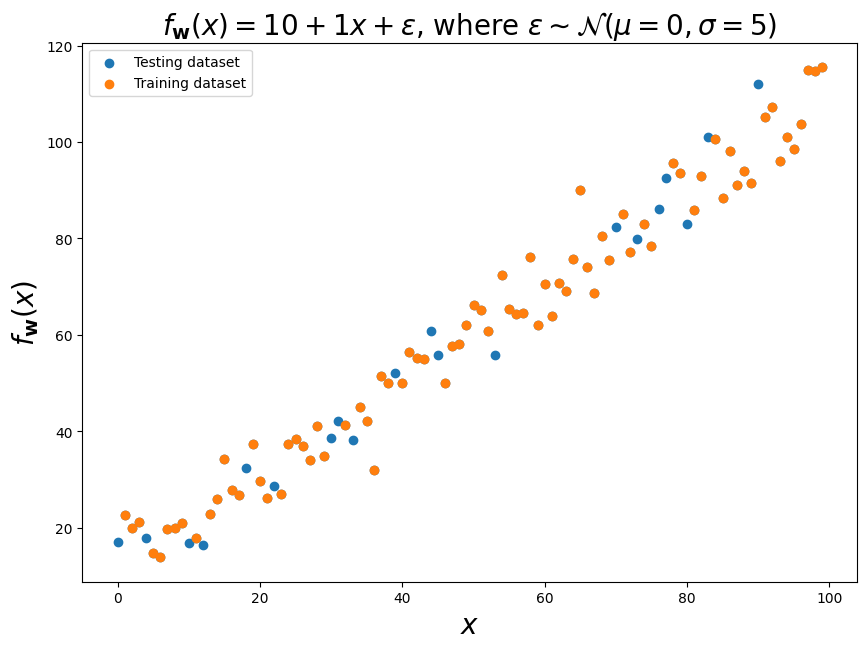

In [7]:
#Visualise the generated synthetic dataset
plt.figure(figsize=(10,7))
plt.scatter(x,y,label='Testing dataset')
plt.scatter(x_train,y_train,label='Training dataset')
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x +\epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$",
          fontsize=20)
plt.legend()
plt.show()

In [ ]:
"""
En esta seccion generamos el mismo grafico de antes pero con la distincion de que ahora de un color (azul) se muestran los datos de prueba y de otro...
(naranja) los datos de entrenamiento del modelo con los mismos ejes y la misma ecuación.
"""

In [8]:
#Build the linear regression model using a multiple-input single neuron
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(optimizer='adam',loss='mse')

In [ ]:
"""
Creamos y compilamos un modelo de regresión lineal simple utilizando TensorFlow y Keras.

'model = tf.keras.Sequential([ tf.keras.layers.Input(shape=(1,)), tf.keras.layers.Dense(1) ])'

'tf.keras.Sequential([...])': Define el modelo secuencial, que es una pila lineal de capas. En este caso, el...
 modelo tendrá solo dos capas: entrada y salida.
'tf.keras.layers.Input(shape=(1,))': Es la capa de entrada del modelo. La función Input especifica que el modelo...
 recibirá una entrada de una sola característica '(shape=(1,))'. Esto se debe a que el arreglo de datos x es un...
 arreglo unidimensional.
'tf.keras.layers.Dense(1)': Es la capa densa, completamente conectada, con una sola neurona. Dado que esta es una...
 regresión lineal, esta capa tiene una única neurona porque estamos prediciendo solo un valor numérico, que es y. Durante....
 el entrenamiento, la capa aprende un peso 'w' y un sesgo 'b', ajustando la función lineal 'y = w * x + b'.


'model.compile(optimizer='adam', loss='mse')'

'model.compile(...)': Prepara el modelo para el entrenamiento, especificando el optimizador y la función de pérdida.
'optimizer='adam'': Especifica el optimizador. Adam combina las ventajas de dos métodos extendidos: AdaGrad y RMSProp, lo...
 que le permite manejar de manera eficiente problemas con grandes y ruidosas cantidades de datos.
'loss='mse'': La función de pérdida mse (error cuadrático medio) mide la media de los cuadrados de las diferencias entre los...
 valores predichos y los valores reales. El objetivo durante el entrenamiento es minimizar esta función de pérdida, haciendo...
 que las predicciones sean más precisas.
"""

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
"""
'model.sumary()' se utiliza para mostrar un resumen detallado del modelo que ha sido construido en Keras.
'Model: "sequential"' Indica que el modelo es de tipo secuencial, disponiendo las capas de manera lineal.

'Layer(type)' nombre del tipo de cada capa.
'Output Shape' es la salida que produce cada capa. Para la capa densa, la salida tiene forma '(None,1)' donde 'None' indica que el tamaño del lote es variable,...
y '1' indica que la capa produce una sola salida por cada entrada.
'Param #' Es el numero de parámetros que tiene cada capa, para este caso son dos que son el peso 'w' y el sesgo 'b'

Al final nos da un resumen de nuestros parámetros, el total que hay, cuales se entrenan y cuales no.
""" 

In [10]:
#Train the model
model.fit(x_train,y_train,epochs=500,batch_size=10,validation_split=0.10,verbose=1)

#Evaluate the model
loss=model.evaluate(x_test, y_test)
print(f'\nTest Lost:{loss}')

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 953.1801 - val_loss: 1196.7686
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 829.4118 - val_loss: 1163.3555
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 830.3785 - val_loss: 1129.4613
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 835.0046 - val_loss: 1096.0050
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 773.4412 - val_loss: 1062.8329
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 709.8549 - val_loss: 1031.2053
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 686.3652 - val_loss: 999.2719
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 784.4234 - val_loss: 967.9244
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 726.7391 - val_loss: 936.9951
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 721.3115 - val_loss: 907.6060
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 701.4705 - val_loss: 879.8580
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━

In [ ]:
"""
'model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=1)'
'model.fit(...)' este método entrena el modelo usando los datos de entrenamiento.
    'x_train' 'y_train' son los datos de entrenamiento que representan el 80% de los datos sintéticos
    'epochs=500' es el numero de épocas, significa que el modelo pasara por todo un conjunto de datos 500 veces durante el entrenamiento. Aumentar...
      el numero de épocas permite que el modelo tenga mas oportunidad de entrenar y aprender de los dato, pero esto puede generar un sobreajuste si es...
      excesivo
    'batch_size=10' muestra el tamaño del lote es de 10. Significa que el modelo actualizara los pesos después de procesar 10 muestras. Utilizar menos... 
     puede ayudar a que el modelo generalice mejor, mientras que un mayor tamaño de lote puede hacer que el entrenamiento sea mas rápido
    'validation_split=0.10' es para reservar el 10% de los datos de entranamiento para validarlos durante el entrenamiento. Esto se usa para evaluar el modelo... 
     en datos que no ha visto durante el entrenamiento en cada época, ayuda a ajustar hiperparametros y prevenir sobreajustes.
    'verbose=1' muestra el progreso del entrenamiento, proporcionando un progrso detallado, incluyendo la perdida y métrica de validación después de cada época.

'loss = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')'

'loss = model.evaluate(x_test, y_test)' evalúa el rendimiento del modelo en el conjunto de prueba
'loss' calcula la erdida en el conjunto de puebra. En este caso sera el 'mse' que utilizamos como función de perdia al compilar el modelo
'print(f'\nTest Loss: {loss}')' Imprime el valor de la perdida, nos permite ver que tan bien funciona el modelo en datos que no ha visto durante el entrenamiento.
"""

In [11]:
#Print the wights of the trained model
weights=model.layers[0].get_weights()
print(f"Weights [wl]:{weights[0]}")
print(f"Biases [w0]: {weights[1]}")


Weights [wl]:[[1.1182824]]
Biases [w0]: [1.9485134]


In [15]:
"""
'weights = model.layers[0].get_weights()'
'model.layers[0]' se refiere a la primera y única capara del modelo (la capa 'Dense')
'get_weights()' devuelve una lista de los pesos y sesgos de la capa
Estos datos se guardan en un arreglo llamado 'weights' y después son impresos.
"""

"\n'weights = model.layers[0].get_weights()'\n"

In [12]:
#Make Predictions
y_pred=model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [ ]:
"""
'y_pred = model.predict(x_test)'
'model.predict(x_text)' utiliza el modelo entrenado para hacer predicciones en el conjunto de datos de prueba
'model.predict(...)' es un método que toma los datos de entrada y pasa cada uno a través del modelo para obtener las predicciones correspondientes
"""

In [13]:
y_pred_train=model.predict(x_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
"""
'y_pred_train = model.predict(x_train)'
'model.predict(x_train)' Similar a lo anterior, este método se usa para hacer las predicciones usando el modelo entrenado
"""

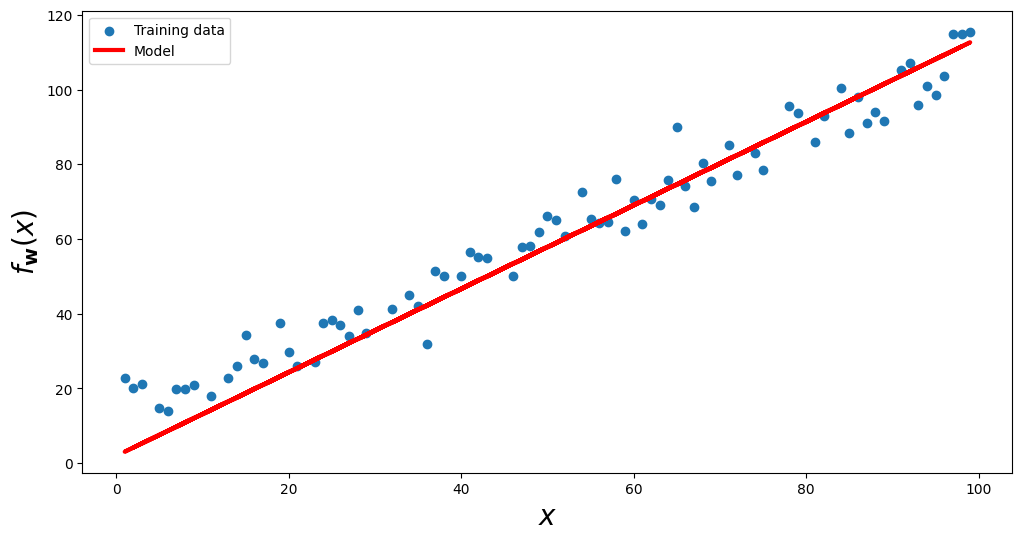

In [14]:
#Plot results
plt.figure(figsize=(12,6))

plt.scatter(x_train,y_train,label='Training data')
plt.plot(x_train,y_pred_train, label='Model', linewidth=3,color=[1,0,0])
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.legend()

In [ ]:
"""
Por ultimo, hacemos un ultimo grafico donde mostramos los datos sintéticos de entrenamiento y la función final obtenida con los pesos que salieron de...
entrenar el modelo
"""